In [7]:
import requests
import csv
from datetime import datetime
from bs4 import BeautifulSoup
import pandas as pd
from matplotlib import pyplot
import matplotlib

In [8]:
url_page = 'http://www.bolsamadrid.es/esp/aspx/Indices/Resumen.aspx'

page = requests.get(url_page).text
soup = BeautifulSoup(page, "lxml")

table = soup.find("table", {'id': 'ctl00_Contenido_tblÍndices'})
name = ""
porcent = ""
nroFila = 0

In [9]:
for fila in table.find_all("tr"):
    #for row in  tabla.find_all("td")::
    nroCelda=0
    for celda in fila.find_all('td'):
        if nroCelda==0:
            name=celda.text
            print("Nombre:", name)
        if nroCelda==3:
            porcent=celda.text
            print("Porcentaje de Dif:", porcent)
        nroCelda+=1
    nroFila+=1

Nombre: IBEX 35®
Porcentaje de Dif: -0,63
Nombre: IBEX 35® con Dividendos
Porcentaje de Dif: -0,63
Nombre: IBEX MEDIUM CAP®
Porcentaje de Dif: -0,98
Nombre: IBEX SMALL CAP®
Porcentaje de Dif: -0,21
Nombre: IBEX 35® Bancos
Porcentaje de Dif: -2,07
Nombre: IBEX 35® Energía
Porcentaje de Dif: -0,20
Nombre: IBEX 35® Construcción
Porcentaje de Dif: 0,75
Nombre: IBEX TOP Dividendo®
Porcentaje de Dif: -0,53
Nombre: IBEX 35® con Dividendos Netos
Porcentaje de Dif: -0,63
Nombre: IBEX 35® Inverso
Porcentaje de Dif: 0,63
Nombre: IBEX 35® Doble Inverso
Porcentaje de Dif: 1,26
Nombre: IBEX 35® Inverso X3
Porcentaje de Dif: 1,88
Nombre: IBEX 35® Inverso X5
Porcentaje de Dif: 3,13
Nombre: IBEX 35® Inverso X10
Porcentaje de Dif: 6,32
Nombre: IBEX 35® Doble Apalancado
Porcentaje de Dif: -1,26
Nombre: IBEX 35® Doble Apalancado Bruto
Porcentaje de Dif: -1,25
Nombre: IBEX 35® Doble Apalancado Neto
Porcentaje de Dif: -1,25
Nombre: IBEX 35® Apalancado X3
Porcentaje de Dif: -1,89
Nombre: IBEX 35® Apalancado 

In [10]:
with open('bolsa_ibex35.csv', 'a', newline='', encoding='utf-8') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow([name, porcent])
csv_file.close()

In [14]:
df = pd.read_csv('bolsa_ibex35.csv')

headerList= ["Name" , "Porcentaje"]

df.to_csv('bolsa_ibex35.csv',header=headerList, index=False)
df = df.sort_values(['Porcentaje'] , ascending=True)
df

,Name,Porcentaje
22,IBEX 35® Impacto Div,-
35,IBEX 35® Protective Put,"-0,09"
65,Índice ITX Apalancado X3,"-0,10"
34,IBEX 35® PutWrite,"-0,12"
36,IBEX 35® Venta de Strangle,"-0,14"
...,...,...
12,IBEX 35® Inverso X5,"3,13"
72,Índice BBVA Inverso X3,"3,96"
13,IBEX 35® Inverso X10,"6,32"
76,Índice BBVA Inverso X5,"6,44"


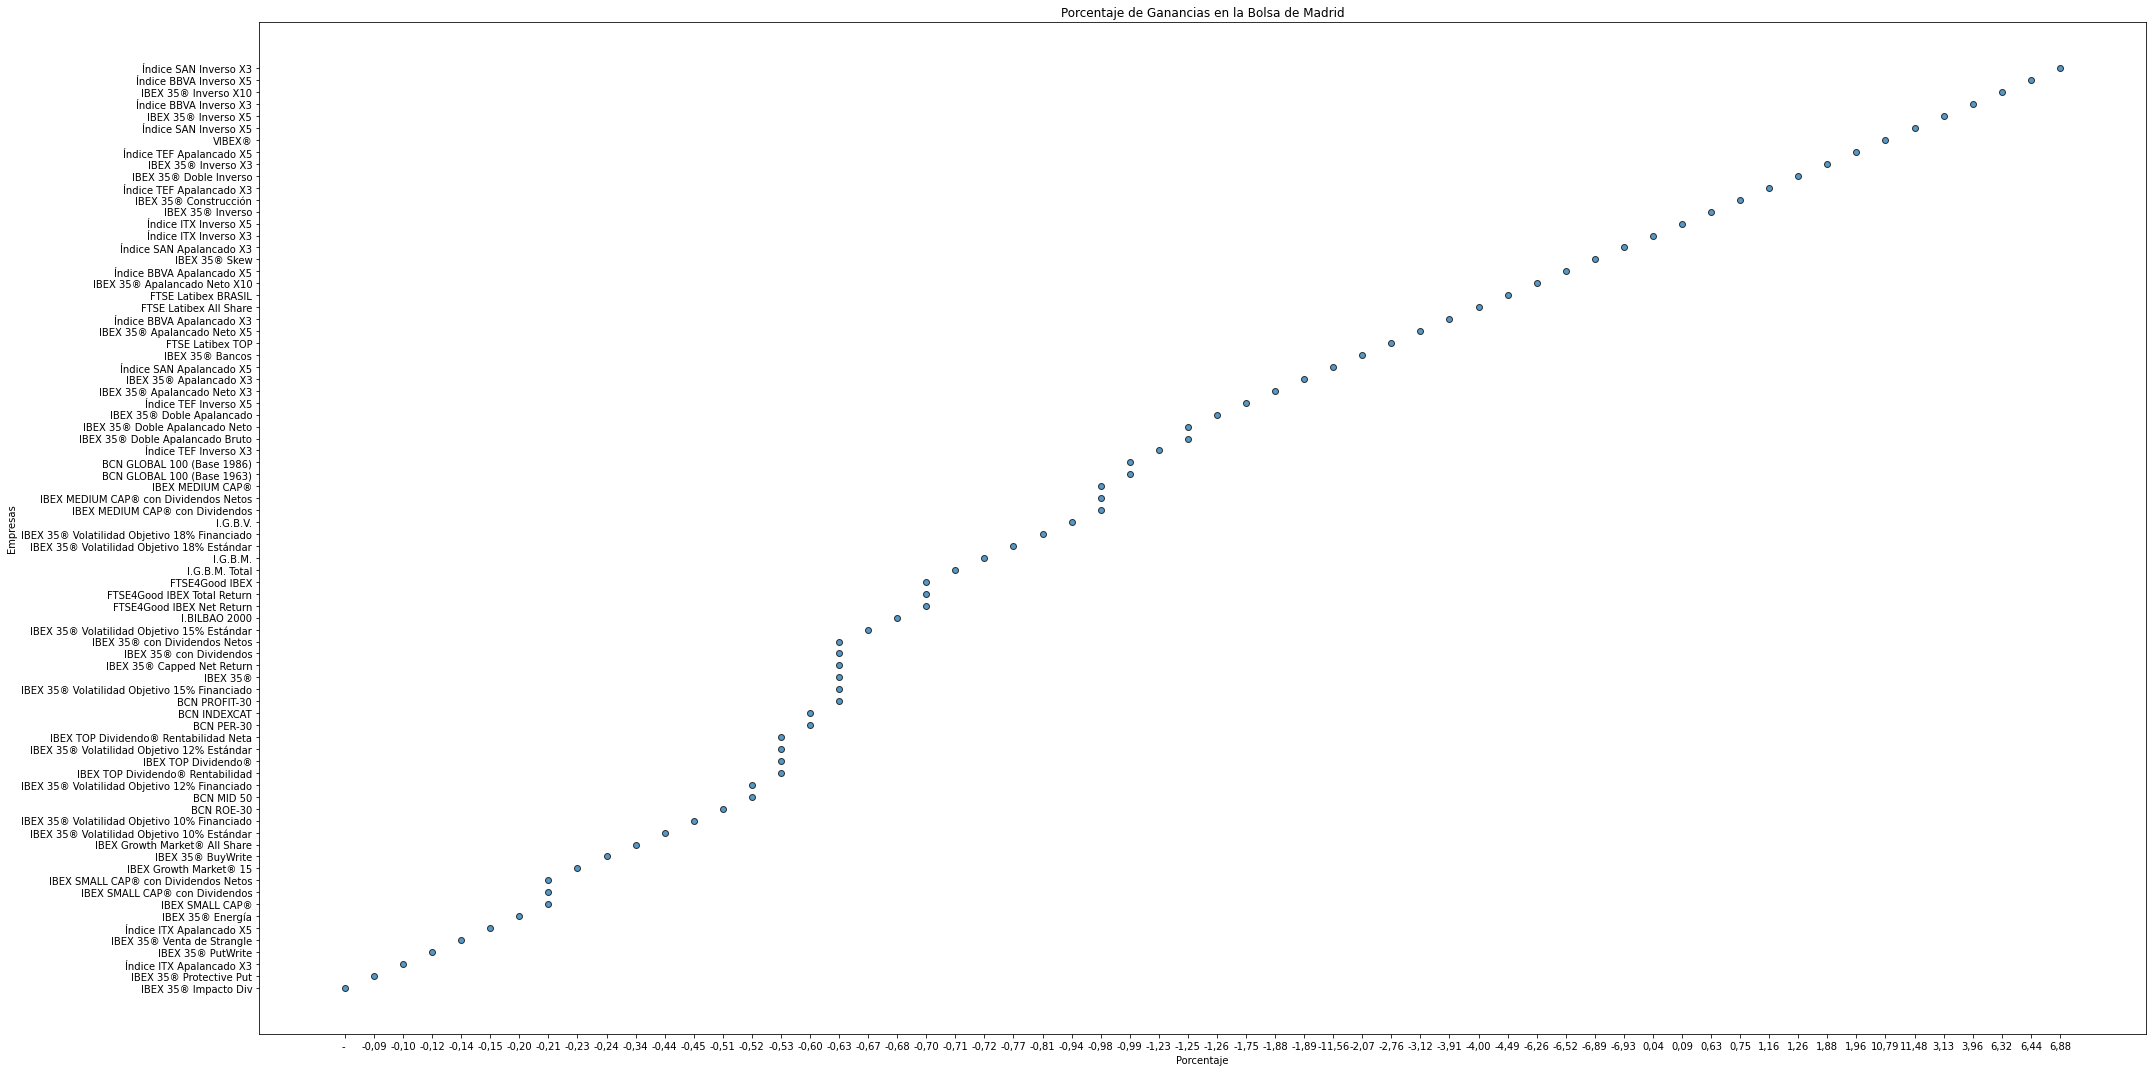

In [16]:


names = df["Name"]
porcentajes = df["Porcentaje"]

matplotlib.rcParams["figure.figsize"] =30 , 15
pyplot.scatter(porcentajes, names, edgecolors="black", linewidths=1,alpha=0.75)
pyplot.title("Porcentaje de Ganancias en la Bolsa de Madrid")
pyplot.xlabel("Porcentaje")
pyplot.ylabel("Empresas")

pyplot.tight_layout()
pyplot.show()

In [13]:
dfprom=df.sample(35)